In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


C:\Users\91999\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91999\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91999\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91999\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
print(tf.__version__)

1.13.1


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from 'C:\\Users\\91999\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

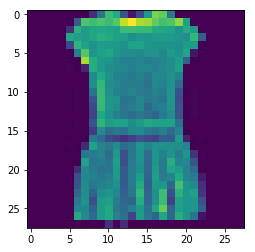

In [10]:
plt.imshow(train_images[3])

In [11]:
len(train_labels)

60000

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


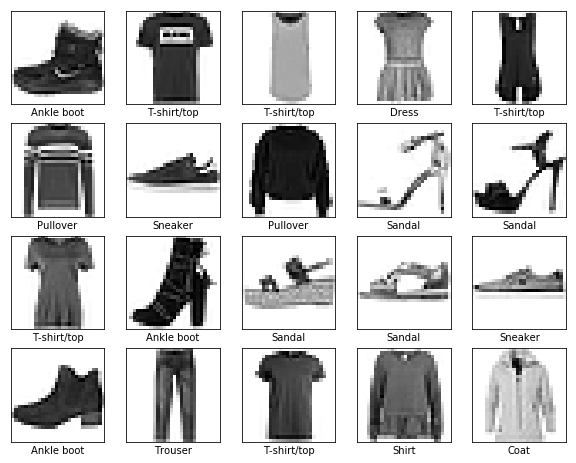

In [17]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.5002 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3767 - acc: 0.8638
Epoch 3/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3405 - acc: 0.8756s - 
Epoch 4/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3131 - acc: 0.8858 ETA: 0s - loss: 0.3132 - acc: 0.8
Epoch 5/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2967 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2833 - acc: 0.8955
Epoch 7/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2688 - acc: 0.899 - 8s 137us/sample - loss: 0.2689 - acc: 0.8995
Epoch 8/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2600 - acc: 0.9026
Epoch 9/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2491 - acc: 0.9

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


 - 1s - loss: 0.3277 - acc: 0.8878

Test accuracy: 0.8878


In [22]:
predictions = model.predict(test_images)


In [23]:
predictions[0]


array([1.6973552e-06, 7.0511658e-10, 7.2697169e-08, 2.4981910e-06,
       1.9266158e-06, 1.4408194e-03, 2.5451466e-06, 4.6465609e-02,
       9.3594826e-07, 9.5208383e-01], dtype=float32)